In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [41]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))


In [25]:
df_t = pd.read_csv("./drive/Shareddrives/TableTestPaper/global_data.csv")
# drop when moving between same points
df_t = df_t[df_t.going_from != df_t.going_to]
df_g = df_t
df_g = df_g[df_g.going_to != " fix/base "] # drop goint_to fix base because is a free-standing location
df_t["groups"] = df_t.going_from + df_t.going_to + df_t.robot

In [26]:
def beautify(df_t):
  df_t.real = ["sim" if val == 0 else "real" for val in df_t.real]
  df_t.tabledist = ["3 cm" if val == 3 else "15 cm" for val in df_t.tabledist]
  df_t["target dist."] = df_t.tabledist
  df_t["move_base"] = df_t["type (move_base)"]
  return df_t[["real", "target dist.", "move_base", "group","intercept"]]

				++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
				+++++++++++++++++++++++++++ TIME +++++++++++++++++++++++++++
				++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,real,tabledist,intercept,type (move_base),group,intercept p,type p,group p,target dist.,move_base
0,sim,3 cm,16.906654,20.915871,0.812209,6.801978e-12,7.328493e-78,0.000058,3 cm,20.915871
1,sim,15 cm,20.192595,6.681645,0.365524,1.049476e-11,3.855803e-04,0.000337,15 cm,6.681645
2,real,3 cm,16.391585,33.817821,0.263266,2.411983e-17,2.205546e-131,0.000425,3 cm,33.817821
3,real,15 cm,14.748679,12.518504,0.130936,1.345811e-23,3.083678e-21,0.002704,15 cm,12.518504


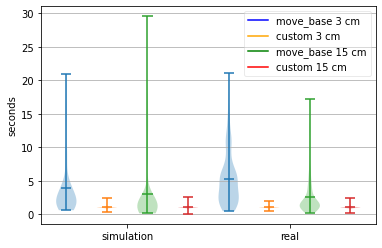

In [47]:
print("\t\t\t\t++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("\t\t\t\t+++++++++++++++++++++++++++ TIME +++++++++++++++++++++++++++")
print("\t\t\t\t++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
time_results = []
for real in [0,1]:
  for tabledist in [3,15]:
      subset = df_t[(df_t.real == real) & (df_t.tabledist == tabledist) ]
      model = smf.mixedlm("time ~ type", subset, groups=subset["groups"])
      result = model.fit()
      time_results.append([real,tabledist] + list(result.params) + list(result.pvalues))

time_results = pd.DataFrame( time_results, columns = ["real", "tabledist", "intercept", "type (move_base)", "group", "intercept p", "type p", "group p"])
beautify(time_results).to_csv("restable_time.csv", index = False, float_format="%.2f")
time_results

fig, axes = plt.subplots()

# move_base 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 3)]["scaled_time"].values, 
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 3)]["scaled_time"].values], showextrema=True, showmeans=True, positions=[1,5])
# custom 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 3)]["scaled_time"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 3)]["scaled_time"].values], showextrema=True, showmeans=True,  positions=[2,6])
# move_base 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 15)]["scaled_time"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 15)]["scaled_time"].values], showextrema=True, showmeans=True, positions=[3,7])
# custom 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 15)]["scaled_time"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 15)]["scaled_time"].values], showextrema=True, showmeans=True,  positions=[4,8])
axes.yaxis.grid(True)
axes.set_ylabel('seconds')
plt.xticks([2.5,6.5], ["simulation", "real"])
plt.plot([], c='blue', label='move_base 3 cm')
plt.plot([], c='orange', label='custom 3 cm')
plt.plot([], c='green', label='move_base 15 cm')
plt.plot([], c='red', label='custom 15 cm')
plt.legend(loc='best', fancybox=True, framealpha=0.4)
time_results


				++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
				+++++++++++++++++++++++++ DISTANCE +++++++++++++++++++++++++
				++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,real,tabledist,intercept,type (move_base),group,intercept p,type p,group p,target dist.,move_base
0,sim,3 cm,0.113747,0.049474,1.012750,2.668384e-22,1.080344e-24,0.000043,3 cm,0.049474
1,sim,15 cm,0.109007,0.024796,0.826016,5.985269e-28,3.253632e-08,0.000048,15 cm,0.024796
2,real,3 cm,0.115160,0.081208,0.452014,3.237544e-20,7.405154e-29,0.000102,3 cm,0.081208
3,real,15 cm,0.109565,0.007591,0.181798,1.005270e-41,2.488281e-01,0.000429,15 cm,0.007591


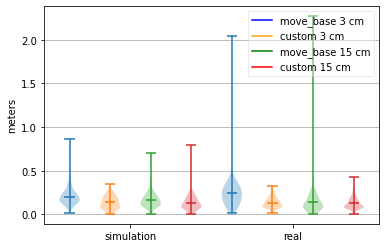

In [31]:
print("\t\t\t\t++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("\t\t\t\t+++++++++++++++++++++++++ DISTANCE +++++++++++++++++++++++++")
print("\t\t\t\t++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
distance_results = []
for real in [0,1]:
  for tabledist in [3,15]:
      subset = df_t[(df_t.real == real) & (df_t.tabledist == tabledist) ]
      model = smf.mixedlm("distance ~ type", subset, groups=subset["groups"])
      result = model.fit()
      distance_results.append([real,tabledist] + list(result.params) + list(result.pvalues))

distance_results = pd.DataFrame( distance_results, columns = ["real", "tabledist", "intercept", "type (move_base)", "group", "intercept p", "type p", "group p"])

beautify(distance_results).to_csv("restable_dist.csv", index = False, float_format="%.3f")

fig, axes = plt.subplots()
# move_base 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 3)]["distance"].values, 
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 3)]["distance"].values], showextrema=True, showmeans=True, positions=[1,5])
# custom 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 3)]["distance"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 3)]["distance"].values], showextrema=True, showmeans=True,  positions=[2,6])
# move_base 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 15)]["distance"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 15)]["distance"].values], showextrema=True, showmeans=True, positions=[3,7])
# custom 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 15)]["distance"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 15)]["distance"].values], showextrema=True, showmeans=True,  positions=[4,8])

axes.yaxis.grid(True)
axes.set_ylabel('meters')
plt.xticks([2.5,6.5], ["simulation", "real"])
plt.plot([], c='blue', label='move_base 3 cm')
plt.plot([], c='orange', label='custom 3 cm')
plt.plot([], c='green', label='move_base 15 cm')
plt.plot([], c='red', label='custom 15 cm')
plt.legend(loc='best', fancybox=True, framealpha=0.4)



distance_results

				++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
				+++++++++++++++++++++++ ORIENTATION ++++++++++++++++++++++++
				++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,real,tabledist,intercept,type (move_base),group,intercept p,type p,group p,target dist.,move_base
0,sim,3 cm,10.825313,-3.242997,0.712083,2.501882e-31,4.290950e-13,0.000097,3 cm,-3.242997
1,sim,15 cm,11.579677,-4.555473,0.850701,2.110274e-34,3.167691e-27,0.000078,15 cm,-4.555473
2,real,3 cm,10.649642,-2.241597,0.791254,8.585842e-23,6.790055e-06,0.000081,3 cm,-2.241597
3,real,15 cm,8.770487,-2.726714,0.924868,4.208650e-19,9.581107e-11,0.000069,15 cm,-2.726714


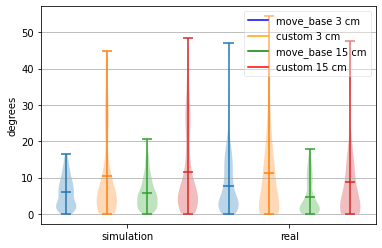

In [32]:
print("\t\t\t\t++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("\t\t\t\t+++++++++++++++++++++++ ORIENTATION ++++++++++++++++++++++++")
print("\t\t\t\t++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

orientation_results = []
for real in [0,1]:
  for tabledist in [3,15]:
      subset = df_t[(df_t.real == real) & (df_t.tabledist == tabledist) ]
      model = smf.mixedlm("orientation ~ type", subset, groups=subset["groups"])
      result = model.fit()
      orientation_results.append([real,tabledist] + list(result.params) + list(result.pvalues))

orientation_results = pd.DataFrame( orientation_results, columns = ["real", "tabledist", "intercept", "type (move_base)", "group", "intercept p", "type p", "group p"])
beautify(orientation_results).to_csv("restable_orientation.csv", index = False, float_format="%.2f")

fig, axes = plt.subplots()
# move_base 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 3)]["orientation"].values, 
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 3)]["orientation"].values], showextrema=True, showmeans=True, positions=[1,5])
# custom 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 3)]["orientation"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 3)]["orientation"].values], showextrema=True, showmeans=True,  positions=[2,6])
# move_base 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 15)]["orientation"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'move_base') & (df_g['tabledist'] == 15)]["orientation"].values], showextrema=True, showmeans=True, positions=[3,7])
# custom 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 15)]["orientation"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'custom') & (df_g['tabledist'] == 15)]["orientation"].values], showextrema=True, showmeans=True,  positions=[4,8])

axes.yaxis.grid(True)
axes.set_ylabel('degrees')
plt.xticks([2.5,6.5], ["simulation", "real"])
plt.plot([], c='blue', label='move_base 3 cm')
plt.plot([], c='orange', label='custom 3 cm')
plt.plot([], c='green', label='move_base 15 cm')
plt.plot([], c='red', label='custom 15 cm')
plt.legend(loc='best', fancybox=True, framealpha=0.4)

orientation_results